# Problem Set 03A Filtros de Kalman

## EJECUTA ESTA CELDA PARA AUTENTICARTE CON TU CUENTA DE GMAIL

In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

## Ejercicio 1

Completa la función siguiente para que, dada un array `m` con mediciones, devuelva el mismo array al que a cada elemento se le ha añadido un ruido gausiano de media 0 y desviación estándar `s`. El ruido añadido a cada elemento ha de ser independiente.

Considera usar la función [`random.normal`](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.normal.html) de Numpy

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


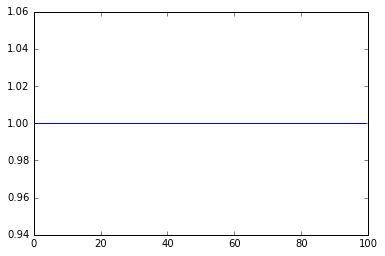

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
m = np.ones(100)
print m
plt.plot(m)

In [28]:
m[0]+np.random.normal(loc=0, scale=.1)

1.0145455912676398

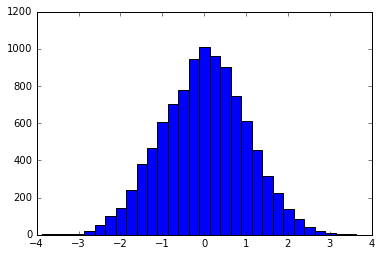

In [11]:
plt.hist(np.random.normal(loc=0, scale=1, size=10000), bins=30);


In [ ]:
def add_noise(m, s):
    import numpy as np

    noisy_data = ???
    
    return noisy_data

import urllib, inspect
src1 = urllib.quote_plus(inspect.getsource(add_noise))


Puedes comprobar tu solución con el siguiente código en el que se le añade ruido con tu función a un array de unos. El histograma generado ha de tener la forma gausiana centrada en 1.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = add_noise(np.ones(10000),1)
plt.hist(x, bins=30);

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS3A_1 $src1

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS3A_1 $src1

## Ejercicio 2

Utiliza un filtro de Kalman para estimar la posición de un robot 1D con velocidad constante. La función que tienes que implementar acepta los siguientes argumentos:

- **measurements**: un array `numpy` $\in \mathbb{R}^n$ con `n` medidas ruidosas de posición 1D.
- **estimated_init_pos**: una estimación de la posición inicial del robot.
- **estimated_vel**: una estimación de la velocidad del robot.

Mediante un filtro de Kalman la función ha de producir una estimación de la posición real del robot a partir de las medidas. Usa para ello una matrix **F** correspondiente al siguiente modelo físico:

$$s^- = s + v$$
$$v^- = v$$
    
con una matriz **H=[1,0]** y unos parámetros **P=1**, **R=40**, **Q=0**

La función ha de devolver un array `numpy` con las mismas dimensiones (`shape`) que las medidas de entrada.

In [ ]:
%run -i code/filter.py

def constant_velocity_estimation(measurements, estimated_init_pos, estimated_vel):
    F = ????
    H = ???? 
    P, R, Q = ????
    
    init_x = ???? 
    
    k = ??? ... create kalman filter

    kalman_positions     = ????
    return kalman_positions

import urllib, inspect
src2 = urllib.quote_plus(inspect.getsource(constant_velocity_estimation))

Puedes verificar tu implementación con el siguiente código. La predicción del filtro de Kalman debería de en gran medida con la posición real del robot.

In [ ]:
%run -i code/filter.py
%matplotlib inline
o = ConstantVelocityRobot(init_pos=0, vel=1, mnoise=10)
o.move_n_time_steps(100)
m = np.array(o.m_history)
k = constant_velocity_estimation(m, 0, 1)
print m.shape, k.shape
p = np.array(o.pos_history)
plt.plot(range(len(p)), p, label="real position")
plt.plot(range(len(m)), m, label="measurements")
plt.plot(range(len(k)), k, label="kalman")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS3A_2 $src2

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS3A_2 $src2

## Ejercicio 3

Utiliza un filtro de Kalman para estimar la posición de un robot 1D con velocidad constante. La función que tienes que implementar acepta los siguientes argumentos:

- **measurements**: un array `numpy` $\in \mathbb{R}^n$ con `n` medidas ruidosas de posición 1D.
- **estimated_init_pos**: una estimación de la posición inicial del robot.
- **estimated_init_vel**: una estimación de la velocidad inicial del robot.
- **estimated_accel**: una estimación de la aceleración del robot.

Mediante un filtro de Kalman la función ha de producir una estimación de la posición real del robot a partir de las medidas. Usa para ello una matrix **F** correspondiente al siguiente modelo físico:

$$s^- = s + v + a$$
$$v^- = v + a$$
$$a^- = a$$
    
con una matriz **H=[1,0,0]** y unos parámetros **P=1**, **R=40**, **Q=0**

Observa que el estado del sistema ahora tiene tres componentes: $s$, $v$ y $a$ y por tanto el estado inicial `init_x` se construye con las estimaciones de la posición y velocidad iniciales y de la aceleración.

La función ha de devolver un array `numpy` con las mismas dimensiones (`shape`) que las medidas de entrada.

In [ ]:
%run -i code/filter.py

def constant_acceleration_estimation(measurements, estimated_init_pos, estimated_init_vel, estimated_accel):
    F = ????
    H = ???? 
    P, R, Q = ????
    
    init_x = ???? 
    
    k = ??? ... create kalman filter

    kalman_positions     = ????
    return kalman_positions

import urllib, inspect
src3 = urllib.quote_plus(inspect.getsource(constant_acceleration_estimation))

Puedes verificar tu implementación con el siguiente código. La predicción del filtro de Kalman debería de en gran medida con la posición real del robot.

In [ ]:
%run -i code/filter.py
%matplotlib inline
o = ConstantAccelerationRobot(init_pos=0, init_vel=1, accel=1, mnoise=500)
o.move_n_time_steps(100)
m = np.array(o.m_history)
k = constant_acceleration_estimation(m, 0, 1, 1)
print m.shape, k.shape
p = np.array(o.pos_history)
plt.plot(range(len(p)), p, label="real position")
plt.plot(range(len(m)), m, label="measurements")
plt.plot(range(len(k)), k, label="kalman")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS3A_3 $src3

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS3A_3 $src3